In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

## Load the train and test data set from the 'dataset' folder

In [2]:
train_data = pd.read_csv("./dataset/train_dataset.csv")
test_data = pd.read_csv("./dataset/test_dataset.csv")

In [3]:
#print(train_data.shape)
#print(test_data.shape)

In [4]:
train_data.info

<bound method DataFrame.info of         0    1    2    3         4         5         6         7         8  \
0     0.0  0.0  1.0  1.0  0.001825  0.000148  0.999852  0.008878  0.018790   
1     0.0  0.0  0.0  0.0  0.008268  0.000324  0.999676  0.009918  0.008227   
2     0.0  0.0  0.0  0.0  0.009266  0.000626  0.999374  0.009355  0.013201   
3     0.0  0.0  0.0  0.0  0.002642  0.000214  0.999786  0.010085  0.017735   
4     0.0  1.0  0.0  0.0  0.008241  0.000074  0.999926  0.045501  0.001971   
...   ...  ...  ...  ...       ...       ...       ...       ...       ...   
5587  0.0  1.0  1.0  1.0  0.002551  0.000240  0.999760  0.010058  0.020899   
5588  0.0  1.0  0.0  0.0  0.018338  0.000095  0.999905  0.040892  0.001006   
5589  0.0  1.0  0.0  0.0  0.040415  0.002947  0.997053  0.022084  0.018438   
5590  0.0  0.0  0.0  0.0  0.002667  0.000076  0.999924  0.009826  0.004994   
5591  1.0  0.0  0.0  0.0  0.001124  0.000059  0.999941  0.008715  0.006400   

             9  ...        31  

## Divide the training data set into data samples and targets/classes

In [5]:
y_train = train_data["koi_disposition"]
X_train = train_data.drop(columns=["koi_disposition"])
print(X_train.shape, y_train.shape)

(5592, 40) (5592,)


## Divide the testing data set into data samples and targets/classes

In [6]:
y_test = test_data["koi_disposition"]
X_test = test_data.drop(columns=["koi_disposition"])
print(X_test.shape, y_test.shape)

(1399, 40) (1399,)


## Features of this data set

In [7]:
features = ["koi_fpflag_nt","koi_fpflag_ss","koi_fpflag_co","koi_fpflag_ec","koi_period","koi_period_err1",
           "koi_period_err2","koi_time0bk","koi_time0bk_err1","koi_time0bk_err2","koi_impact","koi_impact_err1","koi_impact_err2",
           "koi_duration","koi_duration_err1","koi_duration_err2","koi_depth","koi_depth_err1","koi_depth_err2","koi_prad",
           "koi_prad_err1","koi_prad_err2","koi_teq","koi_insol","koi_insol_err1","koi_insol_err2","koi_model_snr","koi_tce_plnt_num",
           "koi_steff","koi_steff_err1","koi_steff_err2","koi_slogg","koi_slogg_err1","koi_slogg_err2","koi_srad","koi_srad_err1",
           "koi_srad_err2","ra","dec","koi_kepmag"]

In [8]:
print(len(features))

40


## Using Scikit-Learn's feature_selection package

### **Univariate feature selection**
#### We can perform SelectKBest or SelectPercentile
#### Performing SelectKBest with the following score_func
- f_classif (*default*)
- mutual_info_classif (*Note: mutual information doesn't return any p-values*)
- chi2

#### Here K is the hyper-parameter, which can be learned [default K = 10, K = "all" for parameter search]
#### Note: percentile in the hyper-parameter for SelectPercentile

#### Fit the data set first to obtain the scores and corresponding p-value for all the features

In [9]:
# Create a model
model = SelectKBest(chi2, k=20).fit(X_train, y_train)

In [10]:
#
# Mask for the selected features
#
selected_features=model.get_support()
#
# Return scores for the features
#
features_score = model.scores_
#
# Return pvalue for the features
#
features_pvalue = model.pvalues_
print(f"Masked Selected Features are: {selected_features}\n\n Features' score is: {features_score}\n\n Features' pvalue is: {features_pvalue} ")

Masked Selected Features are: [ True  True  True  True  True  True False False  True False  True  True
 False  True  True False  True False False False False False  True False
 False False  True  True False  True False False  True False False  True
 False  True  True False]

 Features' score is: [8.26850929e+02 1.23552569e+03 1.10148823e+03 6.82573671e+02
 3.05315853e+01 1.98191765e+01 2.46451612e-01 2.55037859e+00
 1.16118262e+01 1.97682471e-01 6.11776729e+00 3.81783381e+01
 4.28328885e-04 8.74558138e+00 1.22228963e+01 1.98990634e-01
 7.72189161e+01 1.34338182e+00 5.15362530e-04 2.96687192e+00
 4.99072614e+00 1.14727848e-03 2.09298499e+01 2.15150158e+00
 3.08662262e+00 1.52161259e-03 9.37182432e+01 6.73697072e+01
 3.08817658e+00 2.58671603e+01 1.28304302e+00 1.21108540e+00
 1.25166669e+01 2.58836889e+00 3.73351957e+00 9.39098783e+00
 2.01779748e-02 1.28006468e+01 8.79291549e+00 3.58233611e-01]

 Features' pvalue is: [2.82879879e-180 5.11687623e-269 6.52933322e-240 6.03963345e-149
 2.3

### To obtain the transformed data set without using the transform()

In [11]:
X_train_transformed = X_train.loc[:,selected_features]
X_test_transformed = X_test.loc[:,selected_features]
print(X_train_transformed.shape, X_test_transformed.shape)

(5592, 20) (1399, 20)


### To obtain the transformed data set with using the transform()

In [12]:
# X_train_transformed = model.transform(X_train)
# X_test_transformed = model.transform(X_test)
# print(X_train_transformed.shape, X_test_transformed.shape)

### Features selected after the transformation

In [13]:
feature_set = [y for x,y in zip(selected_features, features) if x]
#print(feature_set)
feature_set_score=features_score[selected_features]
#print(feature_set_score)

### Plot the Feature Importance

Text(0.5, 0, 'Score')

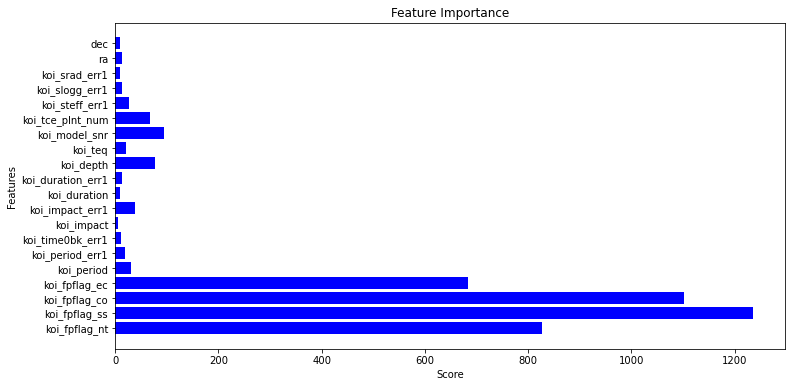

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(feature_set, feature_set_score, color='blue')
plt.title("Feature Importance")
plt.ylabel("Features")
plt.xlabel("Score")

### **Recursive Feature Elimination**

#### Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

#### Create a supervised learning estimator with a "fit" method that provides information about feature importance either through a "coef_" attribute or through a "feature_importances_" attribute

In [15]:
estimator = LinearSVC()
#estimator = DecisionTreeClassifier()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train, y_train)

In [16]:
#
# Mask for the selected features
#
selected_features=selector.support_
#
# Return rank for the features [Features that are "TRUE" are ranked as "1" and are "selected"]
#
features_rank = selector.ranking_
#
# Return number of features selected
#
n_features = selector.n_features_
print(f"Masked Selected Features are: {selected_features}\n\n Features' rank is: {features_rank}\n\n Number of features selected: {n_features} ")

Masked Selected Features are: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]

 Features' rank is: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

 Number of features selected: 39 


### To obtain the transformed data set

In [17]:
X_train_transformed = X_train.loc[:,selected_features]
X_test_transformed = X_test.loc[:,selected_features]
print(X_train_transformed.shape, X_test_transformed.shape)
print(X_train_transformed.head())

(5592, 39) (1399, 39)
     0    1    2    3         4         5         6         7         8  \
0  0.0  0.0  1.0  1.0  0.001825  0.000148  0.999852  0.008878  0.018790   
1  0.0  0.0  0.0  0.0  0.008268  0.000324  0.999676  0.009918  0.008227   
2  0.0  0.0  0.0  0.0  0.009266  0.000626  0.999374  0.009355  0.013201   
3  0.0  0.0  0.0  0.0  0.002642  0.000214  0.999786  0.010085  0.017735   
4  0.0  1.0  0.0  0.0  0.008241  0.000074  0.999926  0.045501  0.001971   

          9  ...        30        31        32        33        34        35  \
0  0.981210  ...  0.914599  0.838443  0.057065  0.942403  0.004391  0.002937   
1  0.991773  ...  0.887478  0.824525  0.047554  0.791460  0.005651  0.015928   
2  0.986799  ...  0.926717  0.822644  0.027174  0.880834  0.005996  0.008810   
3  0.982265  ...  0.950375  0.822080  0.019022  0.895730  0.006113  0.008710   
4  0.998029  ...  0.887478  0.833553  0.061821  0.832175  0.004655  0.010452   

         36        37        38        39  
0 

### Features selected after the transformation

In [18]:
feature_set = [y for x,y in zip(selected_features, features) if x]
print(feature_set)
feature_set_score=features_rank[selected_features]
print(feature_set_score)

['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### Plot the Feature Importance [***Note: Recursive Feature Elimination provides rank to each features without assigning any score to determine the importance of the features***]

Text(0.5, 0, 'Score')

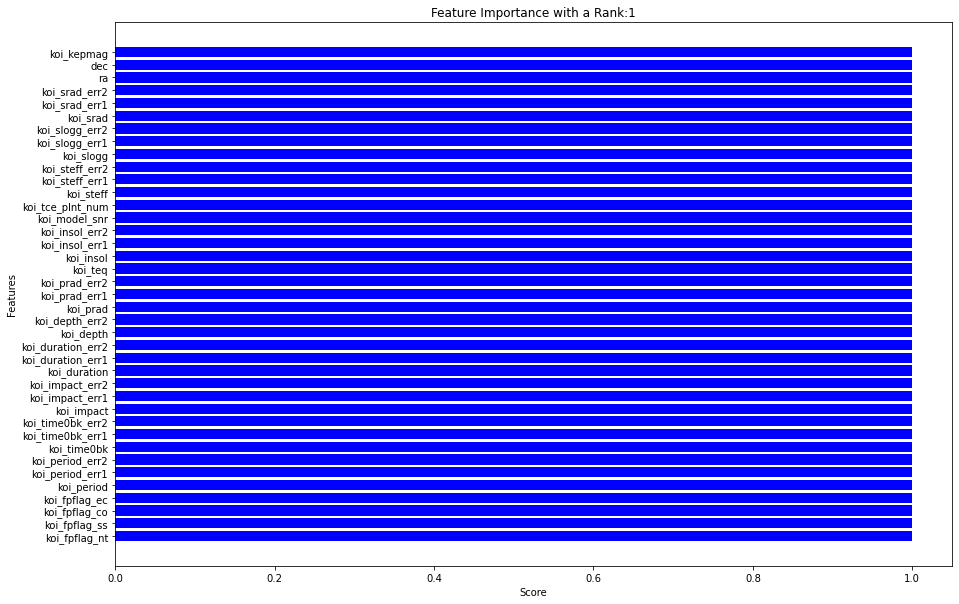

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(feature_set, feature_set_score, color='blue')
plt.title("Feature Importance with a Rank:1")
plt.ylabel("Features")
plt.xlabel("Score")

### **SelectFromModel** [***Note: the "threshold" value is the mean of the feature importance, by default. Otherwise, it is set to (1e-5), when the estimator has a parameter penalty set to "L1"***]

- L1-based feature selection
- Tree-based feature selection
- Permutation Importance

In [20]:
#
# L1-based feature selection
#
#estimator = LogisticRegression(penalty="l1", solver="liblinear").fit(X_train, y_train)
# 
# Tree-based feature selection
#
estimator = ExtraTreesClassifier(n_estimators=100).fit(X_train, y_train)
#
# Permutation Importance
#
#estimator = PermutationImportance(LogisticRegression(), cv=5).fit(X_train, y_train)
model = SelectFromModel(estimator, prefit=True)

In [21]:
#
# Mask for the selected features
#
selected_features=model.get_support()
#
# Return scores for the features [only for tree-based classifiers]
#
features_score=estimator.feature_importances_

In [22]:
print(f"Masked Selected Features are: {selected_features}\n\n Features' score is: {features_score}")

Masked Selected Features are: [ True  True  True  True False False False False False False False False
 False False  True  True False False False False False False False False
 False False  True False False False False False False False False False
 False False False False]

 Features' score is: [0.13888888 0.16447769 0.11998936 0.05783487 0.02037063 0.01354188
 0.01503428 0.01405084 0.0223057  0.01873321 0.01272002 0.01209016
 0.01017243 0.01748127 0.0262423  0.02819637 0.01885091 0.013023
 0.01181755 0.01555872 0.01190151 0.01050476 0.01635065 0.00913779
 0.0093778  0.00874971 0.02743648 0.00969702 0.01044083 0.02155748
 0.01708834 0.01117592 0.01062683 0.01389864 0.00872962 0.01039943
 0.00924994 0.0118767  0.01039173 0.01002875]


### To obtain the transformed data set

In [23]:
X_train_transformed = X_train.loc[:,selected_features]
X_test_transformed = X_test.loc[:,selected_features]
print(X_train_transformed.shape, X_test_transformed.shape)

(5592, 7) (1399, 7)


### Features selected after the transformation

In [24]:
feature_set = [y for x,y in zip(selected_features, features) if x]
print(feature_set)
feature_set_score=features_score[selected_features]
print(feature_set_score)

['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_duration_err1', 'koi_duration_err2', 'koi_model_snr']
[0.13888888 0.16447769 0.11998936 0.05783487 0.0262423  0.02819637
 0.02743648]


### Plot the Feature Importance [***Note: We don't have to provide explicitly the number of features needed to be count as "important features". It is determined by the classifier itself***]

Text(0.5, 0, 'Score')

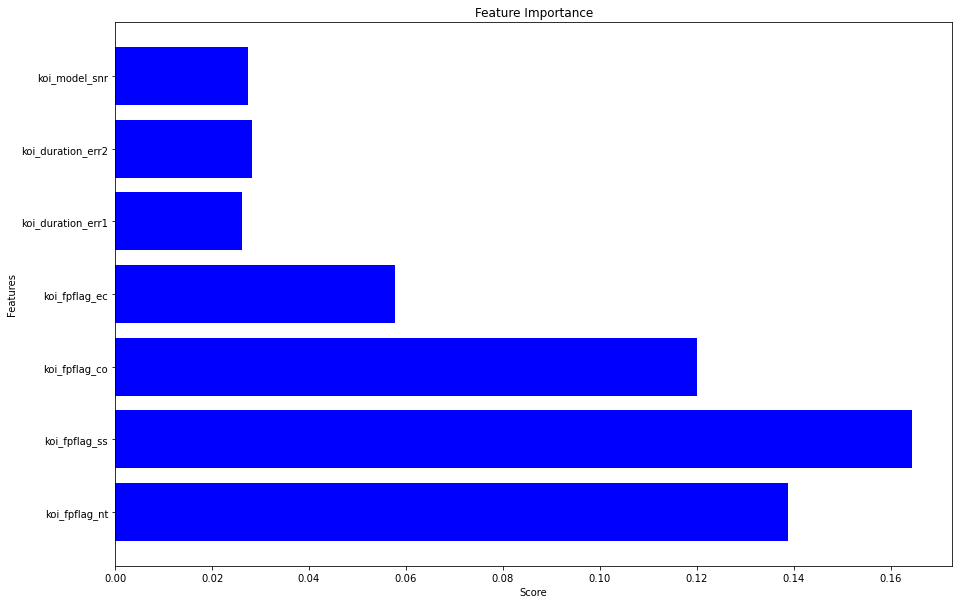

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(feature_set, feature_set_score, color='blue')
plt.title("Feature Importance")
plt.ylabel("Features")
plt.xlabel("Score")

### Sequential Feature Selection [Forward/Backward]

In [26]:
# Build a un-fitted estimator
estimator = DecisionTreeClassifier()
# "n_features_to_select" is a hyper-parameter
model = SequentialFeatureSelector(estimator, n_features_to_select=20, direction='backward', cv=5)
model.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=DecisionTreeClassifier(),
                          n_features_to_select=20)

In [27]:
#
# Mask for the selected features
#
selected_features=model.get_support()
#
print(f"Masked Selected Features are: {selected_features}")


Masked Selected Features are: [ True  True  True  True  True  True False False  True False False False
  True  True False  True  True False False  True False  True False False
 False False  True  True False  True False False False  True False False
 False  True  True  True]


### To obtain the transformed data set

In [28]:
X_train_transformed = X_train.loc[:,selected_features]
X_test_transformed = X_test.loc[:,selected_features]
print(X_train_transformed.shape, X_test_transformed.shape)

(5592, 20) (1399, 20)


### Features selected after the transformation

In [29]:
feature_set = [y for x,y in zip(selected_features, features) if x]
print(feature_set)
feature_set_score= np.ones(len(feature_set))
print(feature_set_score)

['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_time0bk_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err2', 'koi_depth', 'koi_prad', 'koi_prad_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff_err1', 'koi_slogg_err2', 'ra', 'dec', 'koi_kepmag']
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Plot the Feature Importance [***Note: Sequential Feature Selection selects the best features without assigning any score to the features. Although we're using a tree-based model, which has "feature_importance" parameter, but we are fitting the training data to the "SequentialFeatureSelector" and not the "DecisionTreeClassifier". Also, the all tree-based classifiers picked the same seven features.***]

Text(0.5, 0, 'Score')

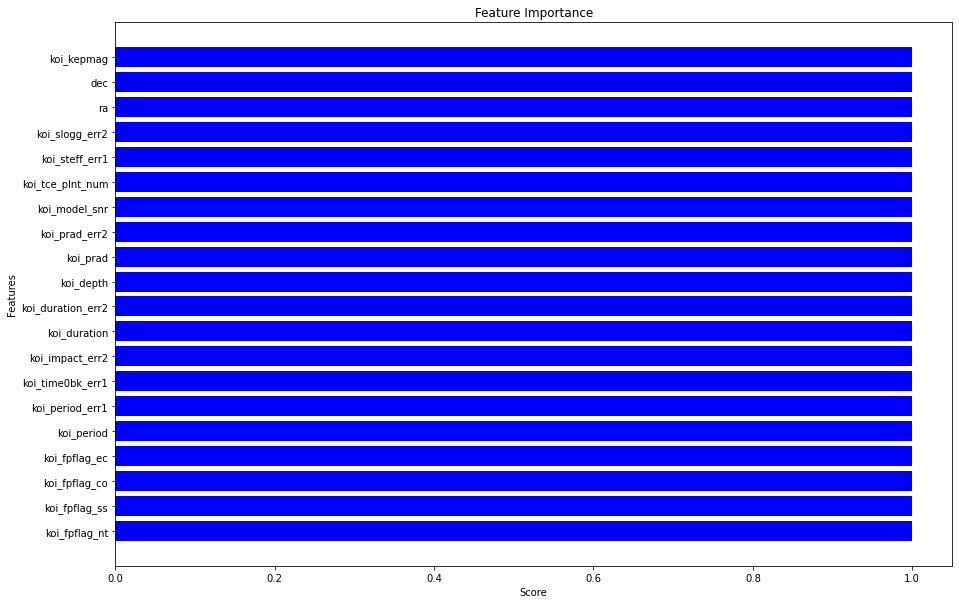

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(feature_set, feature_set_score, color='blue')
plt.title("Feature Importance")
plt.ylabel("Features")
plt.xlabel("Score")

## Analysis

### We can find from the above analysis that the features of interest are - [ koi_fpflag_nt, koi_fpflag_ss, koi_fpflag_co, koi_fpflag_ec]. We can next analyze if there exists any correlation among these features.

In [31]:
features_of_interest= ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_model_snr']
#features_of_interest=features
idx = [i for i, e in enumerate(features) if e in features_of_interest]
print(idx)
data = train_data.iloc[:,idx]
data.columns=features_of_interest
data.head()


[0, 1, 2, 3, 26]


,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_model_snr
0,0.0,0.0,1.0,1.0,0.000773
1,0.0,0.0,0.0,0.0,0.002110
2,0.0,0.0,0.0,0.0,0.000950
3,0.0,0.0,0.0,0.0,0.001171
4,0.0,1.0,0.0,0.0,0.005292


Text(0.5, 1.0, 'HeatMap For Determining Correlation')

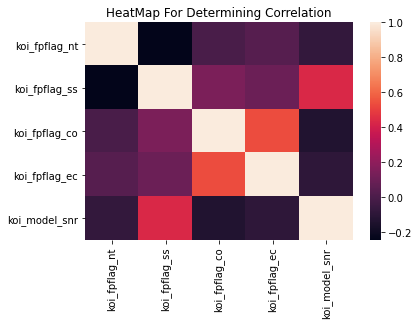

In [32]:
corr=data.corr()
ax=plt.axes()
sns.heatmap(corr, ax=ax)
ax.set_title("HeatMap For Determining Correlation")

### Correlation exists between 'koi_fpflag_co', 'koi_fpflag_ec' and corr between them is > 0.5

# Exit